In [58]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

# Configure the notebook to display the plot inline
%matplotlib inline

In [2]:
data_folder = "../data"
# os.listdir(data_folder)
file_path = os.path.join(data_folder, "Meditation.csv")
df_raw = pd.read_csv(file_path)

In [3]:
# Select some columns for additional analysis
df = df_raw[['Date', 'Forgetting', 'Concentration', 'Mindfulness', 'Investigation', 'Energy', 'Tranquility', 'Distracted']]
# Convert the 'Date' column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

In [4]:
# Display the first 5 rows of the DataFrame
print(df.head())

                     Forgetting  Concentration  Mindfulness  Investigation   
Date                                                                         
2023-03-31 13:58:58           2              2            2            1.0  \
2023-03-31 07:53:28           3              1            0            0.0   
2023-04-01 14:56:07           2              1            2            1.0   
2023-04-01 20:07:51           2              3            3            1.0   
2023-04-02 08:03:22           1              2            1            0.0   

                     Energy  Tranquility  Distracted  
Date                                                  
2023-03-31 13:58:58       1            2         NaN  
2023-03-31 07:53:28       1            0         NaN  
2023-04-01 14:56:07       1            1         NaN  
2023-04-01 20:07:51       2            3         NaN  
2023-04-02 08:03:22       1            2         NaN  


In [82]:
def plot(df, frequency=None, sampling_method='mean', max_metrics_per_subplot=None):
    # Create a dictionary to map frequency strings to pandas offset aliases
    freq_dict = {
        'hourly': 'H',
        'daily': 'D',
        'weekly': 'W',
        'biweekly': '2W',
        'monthly': 'M',
        'yearly': 'Y'
    }
    
    # Resample the data if frequency is not None
    if frequency is not None:
        # Convert frequency string to pandas offset alias
        resample_frequency = freq_dict[frequency]
        
        # Resample the data
        if sampling_method == 'mean':
            df = df.resample(resample_frequency).mean()
        elif sampling_method == 'min':
            df = df.resample(resample_frequency).min()
        elif sampling_method == 'max':
            df = df.resample(resample_frequency).max()
        else:
            raise ValueError("Invalid method. Choose from 'mean', 'min', 'max'.")
    
    # Plot all metrics on the same plot if max_metrics_per_subplot is None
    if max_metrics_per_subplot is None:
        ax = df.plot(style='x-', grid=True, markersize=10, figsize=(15, 5))
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#         ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.tight_layout()
        plt.show()
        return

    # Otherwise, create subplots
    num_metrics = len(df.columns)
    num_subplots = math.ceil(num_metrics / max_metrics_per_subplot)
    
    fig, axs = plt.subplots(num_subplots, 1, figsize=(15, 5 * num_subplots), sharex=True)
    if num_subplots == 1:
        axs = [axs]

    for i, ax in enumerate(axs):
        start = i * max_metrics_per_subplot
        end = min((i + 1) * max_metrics_per_subplot, num_metrics)
        df.iloc[:, start:end].plot(ax=ax, style='x-', grid=True, markersize=10)
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#         ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    
    plt.tight_layout()
    plt.show()


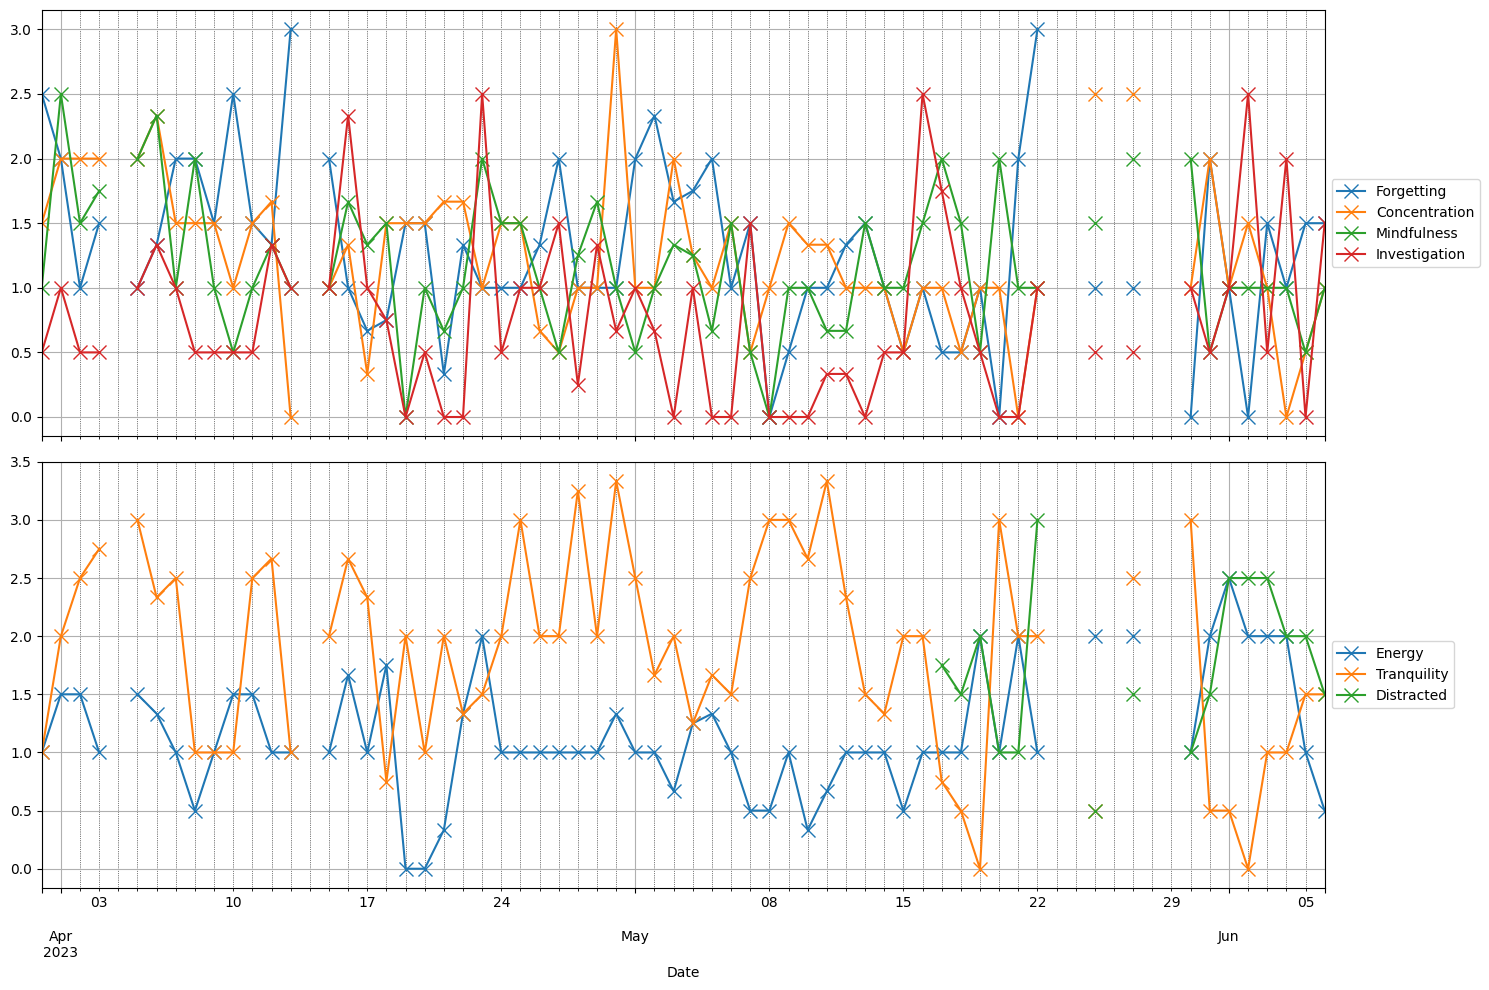

In [85]:
plot(df, frequency='daily', max_metrics_per_subplot=4)

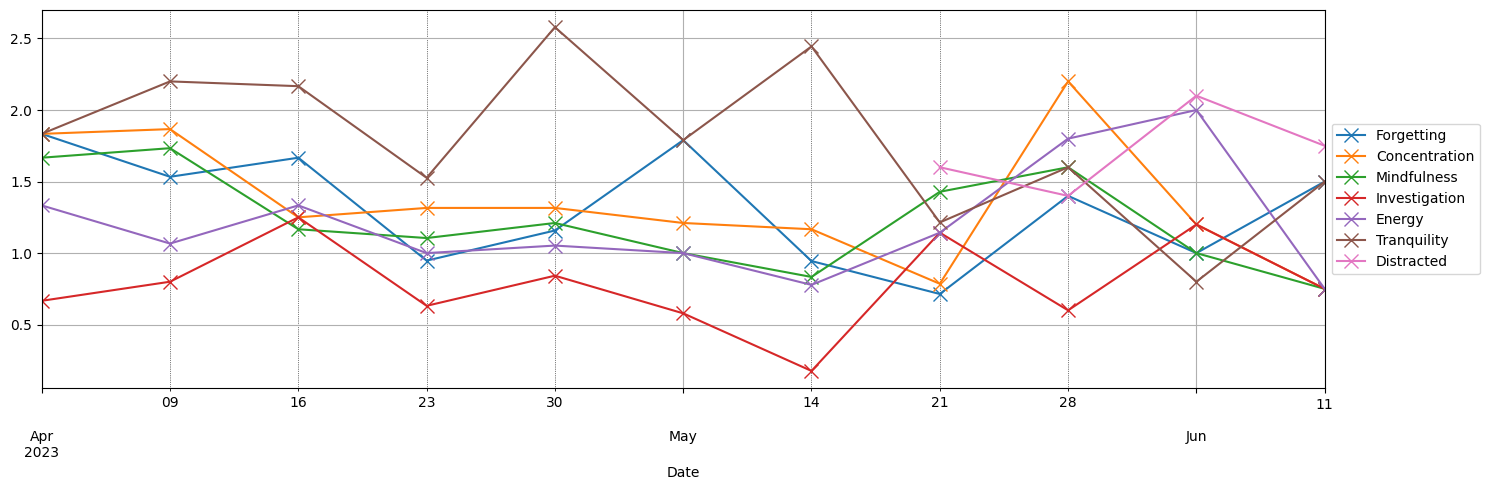

In [86]:
plot(df, frequency='weekly', sampling_method='mean')

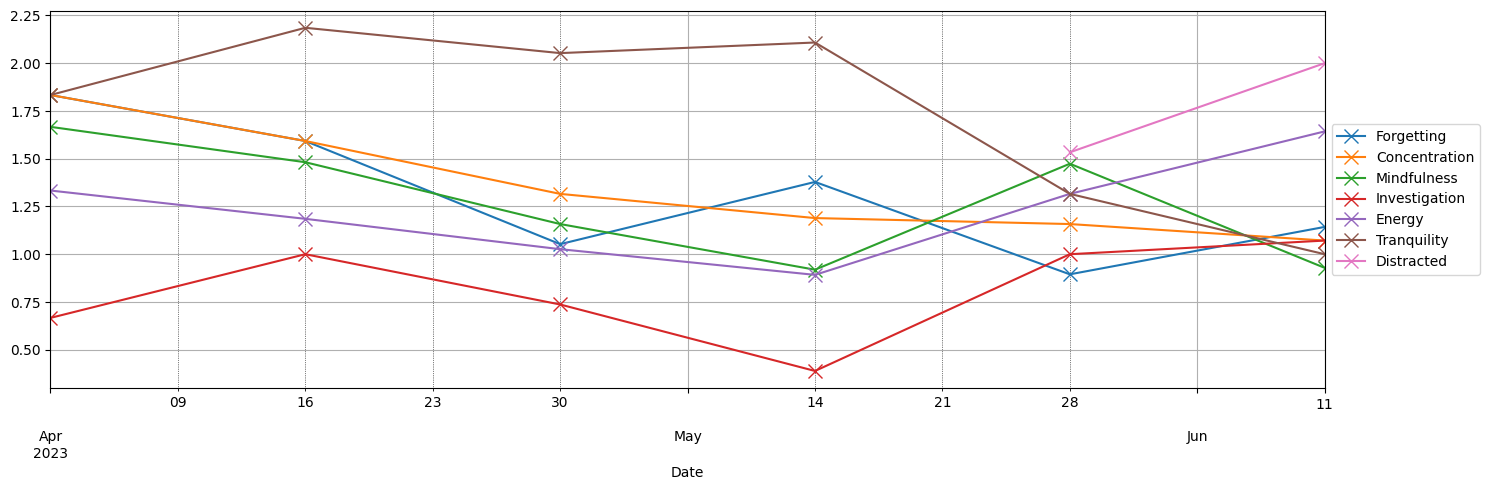

In [90]:
plot(df, frequency='biweekly', sampling_method='mean')